# **Image Classification (Cat/Dog)**

The aim of this project is to build and evaluate a robust binary image classification model that can accurately distinguish between cats and dogs using a Convolutional Neural Network (CNN)

In [1]:
# import the required libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the data
# Importing the training data
x_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /labels.csv', delimiter=',')

# Importing the testing data
x_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /input_test.csv', delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /labels_test.csv', delimiter=',')

In [4]:
x_train

array([[ 37.,  39.,  25., ...,  58.,  54.,  29.],
       [131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [5]:
y_train # 0 - Dog and 1 - Cat

array([0., 0., 0., ..., 1., 1., 1.])

In [6]:
x_test

array([[118.,  82.,  96., ..., 140.,  79.,  16.],
       [223., 211., 163., ...,  70.,  73.,  78.],
       [ 73.,  67.,  43., ..., 222., 211., 165.],
       ...,
       [249., 245., 242., ...,  73.,  72.,  68.],
       [ 97.,  96., 102., ...,  84.,  78.,  80.],
       [ 94.,  66.,  63., ..., 119.,  96.,  80.]])

In [7]:
# Dimension of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# (2000, 30000) --> 2000 images of each having 30000 columns, each column is a pixel

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [8]:
# pixel values
print('Minimum pixel value:', x_train.min())
print('Maximum pixel value:', x_train.max())

# This represents the image can be RGB

Minimum pixel value: 0.0
Maximum pixel value: 255.0


In [9]:
# reshape the training data
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

# reshape the test data
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [10]:
# data after reshaping
print('Shape of the data after reshaping:')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shape of the data after reshaping:
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [11]:
# Data scaling
x_train = x_train/255.0
x_test = x_test/255.0

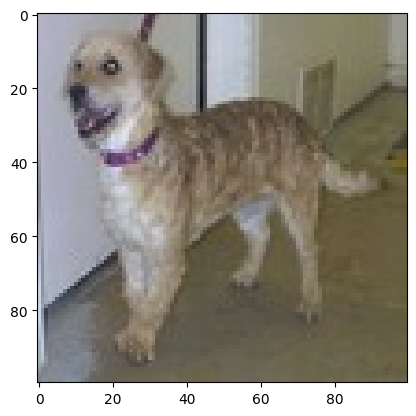

The target label is: [0.]


In [12]:
# printing the first image
plt.imshow(x_train[355, :])
plt.show()

# print the target for the first image
print('The target label is:', y_train[355])


# **CNN Model Building**

### **Baseline CNN**

In [13]:
# Baseline model libraries
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
baseline_model = Sequential([
    # first conv layer
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),

    # second conv layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatter
    Flatten(),

    # First Dense layer
    Dense(70, activation='relu'),

    # Output layer
    Dense(1, activation='sigmoid')
])

In [15]:
# Compiling the model
baseline_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [16]:
# training the model with the data
model_history = baseline_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5315 - loss: 0.6897 - val_accuracy: 0.7800 - val_loss: 0.6543
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5481 - loss: 0.6857 - val_accuracy: 0.0150 - val_loss: 0.9374
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5801 - loss: 0.6760 - val_accuracy: 0.0150 - val_loss: 0.9314
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5864 - loss: 0.6698 - val_accuracy: 0.1200 - val_loss: 0.8154
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6191 - loss: 0.6591 - val_accuracy: 0.0150 - val_loss: 1.0912
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6227 - loss: 0.6627 - val_accuracy: 0.0150 - val_loss: 1.0656
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6001 - loss: 0.6611 - val_accuracy: 0.7350 - val_loss: 0.6035
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6331 - loss: 0.6472 - val_accuracy: 0.3500 - val

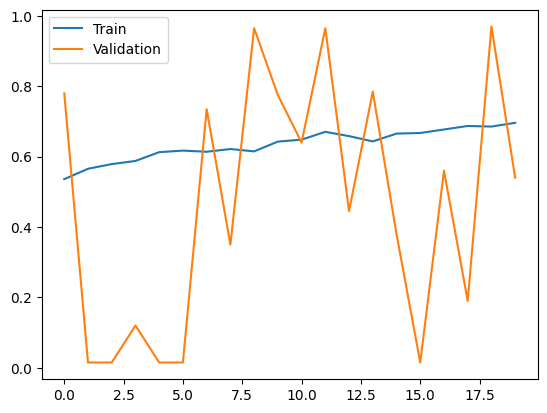

In [17]:
# Training vs validation accuracy
plt.plot(model_history.history['accuracy'], label='Train')
plt.plot(model_history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


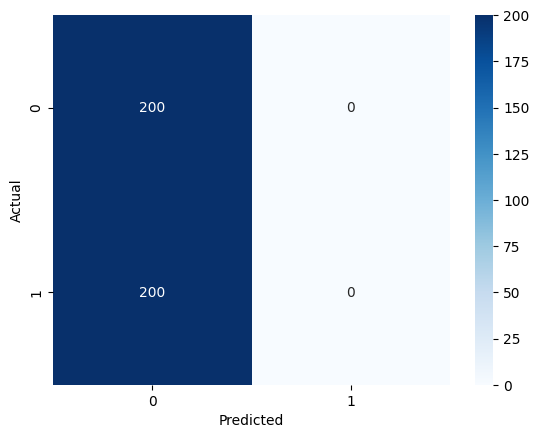

In [18]:
# Confusion matrix
y_pred = baseline_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Switching to pretrained MobileNetV2**

An initial CNN trained from scratch showed unstable validation behavior due to the limited dataset size (2,000 images). To address data scarcity and improve generalization, transfer learning with a pretrained MobileNetV2 backbone was adopted, resulting in significantly improved and stable performance.

In [19]:
# import MobileNetV2 and suporting libraries
from sklearn.model_selection import train_test_split
import keras
from keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [20]:
# Creating a validation split
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

In [21]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(100, 100, 3)
)

base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
#Adding a clean classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

In [23]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Adding data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train_new)

In [25]:
# training the model with the data
history = model.fit(datagen.flow(x_train_new, y_train_new, batch_size=32), epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 396ms/step - accuracy: 0.7756 - loss: 0.5314 - val_accuracy: 0.8400 - val_loss: 0.3128
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8438 - loss: 0.3275 - val_accuracy: 0.8800 - val_loss: 0.2795
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8743 - loss: 0.2801 - val_accuracy: 0.8850 - val_loss: 0.2765
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8893 - loss: 0.2543 - val_accuracy: 0.8750 - val_loss: 0.2775
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8830 - loss: 0.2617 - val_accuracy: 0.8850 - val_loss: 0.2895
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8814 - loss: 0.2501 - val_accuracy: 0.9050 - val_loss: 0.2525
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9214 - loss: 0.1957 - val_accuracy: 0.9050 - val_loss: 0.2579
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8996 - loss: 0.2345 - val_accuracy: 0.9000

In [26]:
# evaluating the model
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 813ms/step - accuracy: 0.9162 - loss: 0.1957


[0.2111494243144989, 0.9075000286102295]

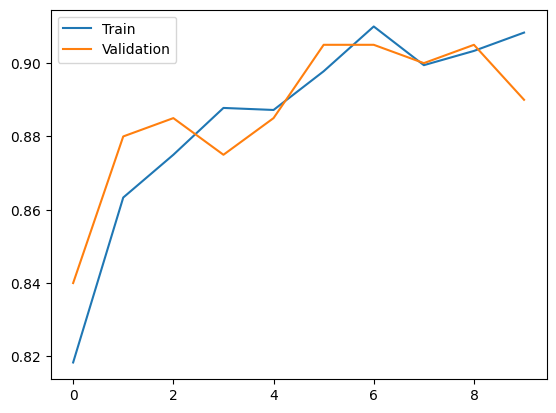

In [27]:
# Training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 368ms/step


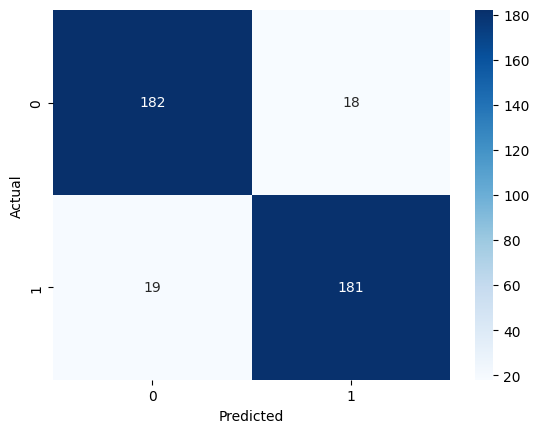

In [28]:
# Confusion matrix
y_prob = model.predict(x_test)
y_pred = (y_prob >= 0.5).astype(int).reshape(-1)
cm = confusion_matrix(y_test.reshape(-1), y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
# trainng data distribution of target
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[0. 1.] [1000 1000]


In [30]:
len(x_test)

400

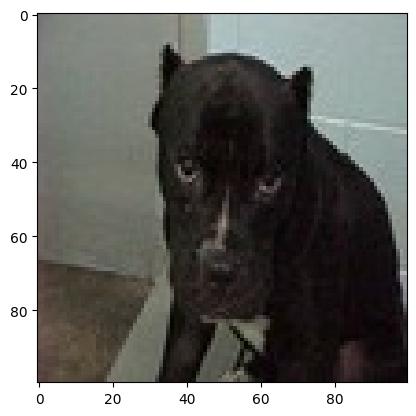

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction Probability: [[0.00074004]]
The actual image is: Dog
The model has predicted as: Dog
The image value 78


In [33]:
# predictions
rdm_img = random.randint(0, len(x_test))
plt.imshow(x_test[rdm_img, :])
plt.show()

# actual condition
if y_test[rdm_img, :] == 0:
    actual = 'Dog'
else:
    actual = 'Cat'

# prediction for the given image
y_pred = model.predict(x_test[rdm_img, :].reshape(1, 100, 100, 3))
print('Prediction Probability:', y_pred)

if y_pred >= 0.5:
    pred = 'Cat'
else:
    pred = 'Dog'
print('The actual image is:', actual)
print('The model has predicted as:', pred)
print('The image value',rdm_img)

# **Final Conclusion**

In this project, I built a CNN-based image classification model to distinguish between cats and dogs using a relatively small dataset of 2,000 training images. An early attempt to train a CNN from scratch quickly revealed its limitations—validation performance was unstable and the model struggled to generalize, making it clear that learning deep visual features from limited data was not effective.

To overcome this, I switched to a transfer learning approach using a pretrained MobileNetV2 backbone. By freezing the convolutional layers and training a lightweight classifier head on top, the model was able to reuse strong visual features learned from large-scale image data while keeping overfitting under control. Data augmentation further improved robustness by introducing realistic variations in the training images.

The final model achieved approximately 92% accuracy on an unseen test set, with balanced performance across both classes, as confirmed by the confusion matrix. Training and validation curves showed stable convergence with no significant generalization gap, indicating that the model learned meaningful visual patterns rather than memorizing the data.

Overall, this project reflects practical deep learning decision-making—knowing when training from scratch is not suitable, applying transfer learning effectively, and evaluating results using correct and reliable metrics.